In [129]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import kstest, normaltest

In [130]:
class lcg():

    def __init__(self, seed, multiplier, increment, modulus):
        self.seed = seed
        self.multiplier = multiplier
        self.increment = increment
        self.modulus = modulus

    def random(self):
        self.seed = (self.seed * self.multiplier + self.increment) % self.modulus
        return self.seed / self.modulus

    def n_random(self, n):
        return [self.random() for _ in range(n)]

In [131]:
# https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform
def box_muller_transform(u1, u2):
    r = np.sqrt(-2 * np.log(u1))
    theta = 2 * np.pi * u2
    z0 = r * np.cos(theta)
    z1 = r * np.sin(theta)
    return z0, z1

In [132]:
prng = lcg(seed=54321, multiplier=48271, increment=0, modulus=2**31 - 1) # C++11's minstd_rand
u1 = np.array(prng.n_random(1000000))
u2 = np.array(prng.n_random(1000000))
z0, z1 = box_muller_transform(u1, u2)

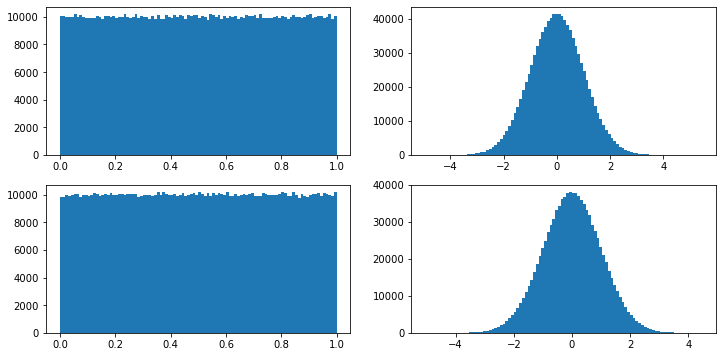

In [133]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

axes[0][0].hist(u1, bins=100)
axes[0][1].hist(z0, bins=100)

axes[1][0].hist(u2, bins=100)
axes[1][1].hist(z1, bins=100)

plt.show()
#sns.distplot(z0)
#sns.distplot(z1)

### De normaalverdeling testen



In [134]:
_, p_value = kstest(z0, 'norm')
alpha = 0.1 # 10 %
if p_value < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis for z0 can be rejected")
else:
    print("The null hypothesis for z0 cannot be rejected")

_, p_value = kstest(z0, 'norm')
if p_value < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis for z1 can be rejected")
else:
    print("The null hypothesis for z1 cannot be rejected")

The null hypothesis for z0 cannot be rejected
The null hypothesis for z1 cannot be rejected


In [135]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
_, p_value = normaltest(z0)
alpha = 1e-3
if p_value < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis for z0 can be rejected")
else:
    print("The null hypothesis for z0 cannot be rejected")

_, p_value = normaltest(z1)
if p_value < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis for z1 can be rejected")
else:
    print("The null hypothesis for z1 cannot be rejected")

The null hypothesis for z0 cannot be rejected
The null hypothesis for z1 cannot be rejected
